In [1]:
import pandas as pd
import urllib.request as url
import json

In [2]:
path = "https://data.covid19india.org/states_daily.json"
response = url.urlopen(path)

In [3]:
data = json.load(response)

In [4]:
type(data)

dict

In [5]:
data.keys()

dict_keys(['states_daily'])

In [6]:
states = data['states_daily']

In [7]:
df = pd.DataFrame(states)

In [8]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [13]:
df['tt'][0]

'81'

In [14]:
# type casting
df['tt'] = df['tt'].astype('int32')
df['dl'] = df['dl'].astype('int32')
df['mh'] = df['mh'].astype('int32')
df['rj'] = df['rj'].astype('int32')
df['up'] = df['up'].astype('int32')

In [15]:
df['tt'][0]

81

In [16]:
deceased_cases = df[df['status'] == 'Deceased']

In [17]:
deceased_cases.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
5,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Deceased,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,16-Mar-20,2020-03-16,0,...,0,Deceased,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,17-Mar-20,2020-03-17,0,...,0,Deceased,0,0,0,1,0,0,0,0
14,0,0,0,0,0,0,0,18-Mar-20,2020-03-18,0,...,0,Deceased,0,0,0,0,0,0,0,0


In [19]:
deceased_cases['tt'].sum()

432117

In [20]:
df['dateymd'][0]

'2020-03-14'

In [21]:
df['dateymd'] = pd.to_datetime(df['dateymd'])

In [22]:
df['dateymd'][0]

Timestamp('2020-03-14 00:00:00')

In [24]:
df['Month'] = pd.to_datetime(df['dateymd']).dt.month

In [25]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,status,tg,tn,tr,tt,un,up,ut,wb,Month
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,Confirmed,1,1,0,81,0,12,0,0,3
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,Recovered,0,0,0,9,0,4,0,0,3
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,Deceased,0,0,0,2,0,0,0,0,3
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,Confirmed,2,0,0,27,0,1,0,0,3
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,Recovered,1,0,0,4,0,0,0,0,3


In [26]:
df['Year'] = pd.to_datetime(df['dateymd']).dt.year

In [27]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,tg,tn,tr,tt,un,up,ut,wb,Month,Year
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,1,1,0,81,0,12,0,0,3,2020
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,0,0,9,0,4,0,0,3,2020
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,0,0,2,0,0,0,0,3,2020
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,2,0,0,27,0,1,0,0,3,2020
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,1,0,0,4,0,0,0,0,3,2020


In [29]:
df.groupby(['Year', 'status'])['tt'].sum()

Year  status   
2020  Confirmed    10285593
      Deceased       149022
      Recovered     9881565
2021  Confirmed    21963451
      Deceased       283095
      Recovered    21559533
Name: tt, dtype: int32

In [30]:
import matplotlib.pyplot as plt

In [31]:
confirmed_df = df[df['status'] == 'Confirmed']
recovered_df = df[df['status'] == 'Recovered']
deceased_df = df[df['status'] == 'Deceased']

In [32]:
len(confirmed_df)

521

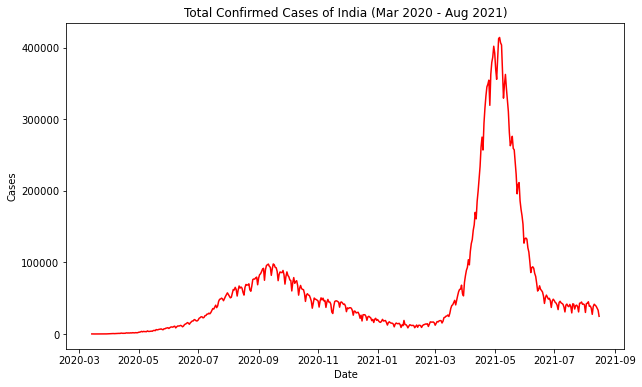

In [36]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['tt'], color='red')
# plt.scatter(confirmed_df['dateymd'], confirmed_df['tt'], color='red')
plt.title("Total Confirmed Cases of India (Mar 2020 - Aug 2021)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

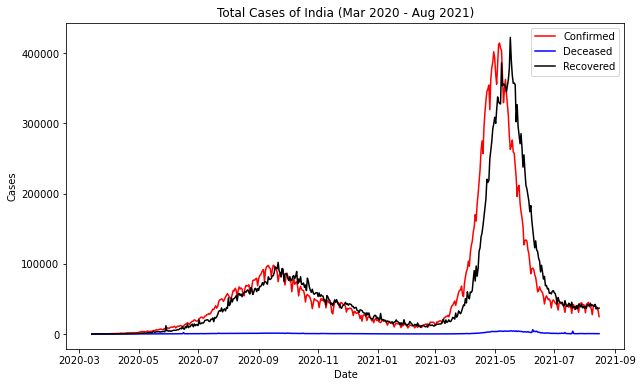

In [38]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['tt'], color='red', label="Confirmed")
plt.plot(deceased_df['dateymd'], deceased_df['tt'], color='blue', label="Deceased")
plt.plot(recovered_df['dateymd'], recovered_df['tt'], color='black', label="Recovered")
plt.title("Total Cases of India (Mar 2020 - Aug 2021)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()

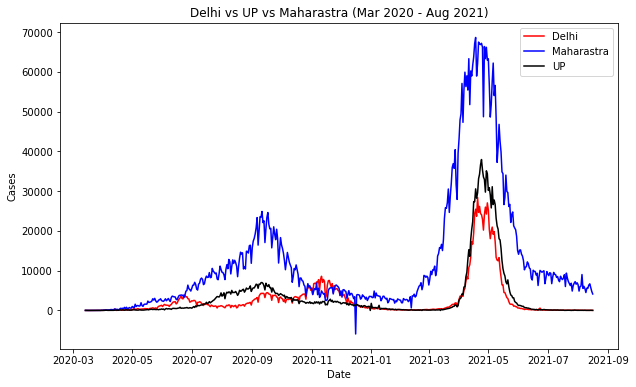

In [39]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['dl'], color='red', label="Delhi")
plt.plot(confirmed_df['dateymd'], confirmed_df['mh'], color='blue', label="Maharastra")
plt.plot(confirmed_df['dateymd'], confirmed_df['up'], color='black', label="UP")
plt.title("Delhi vs UP vs Maharastra (Mar 2020 - Aug 2021)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()

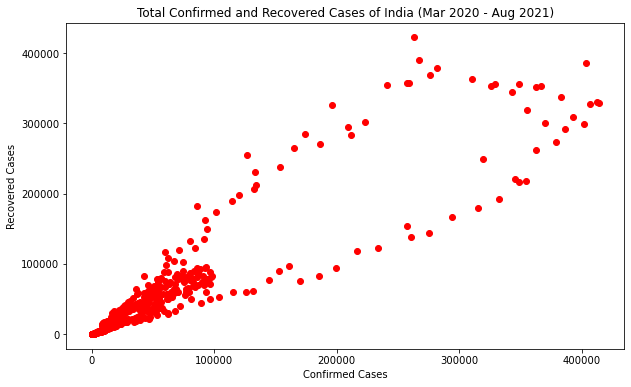

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(confirmed_df['tt'], recovered_df['tt'], color='red')
plt.title("Total Confirmed and Recovered Cases of India (Mar 2020 - Aug 2021)")
plt.xlabel("Confirmed Cases")
plt.ylabel("Recovered Cases")
plt.show()

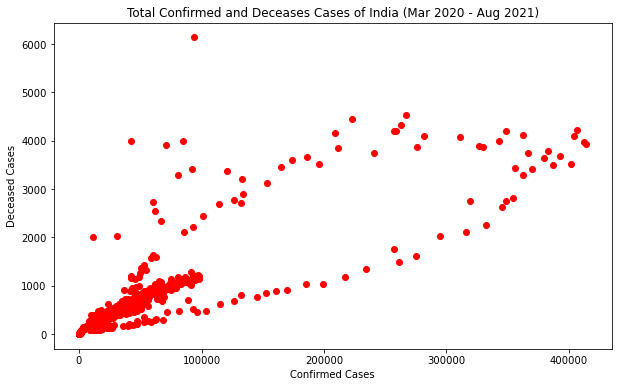

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(confirmed_df['tt'], deceased_df['tt'], color='red')
plt.title("Total Confirmed and Deceases Cases of India (Mar 2020 - Aug 2021)")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deceased Cases")
plt.show()